In [1]:
import pandas as pd


In [2]:
# Read Task_A_rater_001.xlsx file
task_a_rater_001_path = "ExpertRatings/Task_A_rater_001.xlsx"
task_a_rater_001_df = pd.read_excel(task_a_rater_001_path, engine='openpyxl')

# Read secret_master.xlsx file
secret_master_path = "ExpertRatings/secret_master.xlsx"
secret_master_df = pd.read_excel(secret_master_path, engine='openpyxl')


In [3]:
# Merge the DataFrames on the 'index' column
merged_df = pd.merge(task_a_rater_001_df, secret_master_df[['index', 'AGI', 'Task', 'GPT', 'Run', 'Table Index']], on='index', how='left')


In [7]:
# Calculate mean values for each unique combination of 'AGI', 'Task', and 'GPT' for both columns
grouped_means = merged_df.groupby(['AGI', 'Task', 'GPT'])[['Factually correct 1-10', 'Detailed 1-10 (examples are good)']].mean().reset_index()

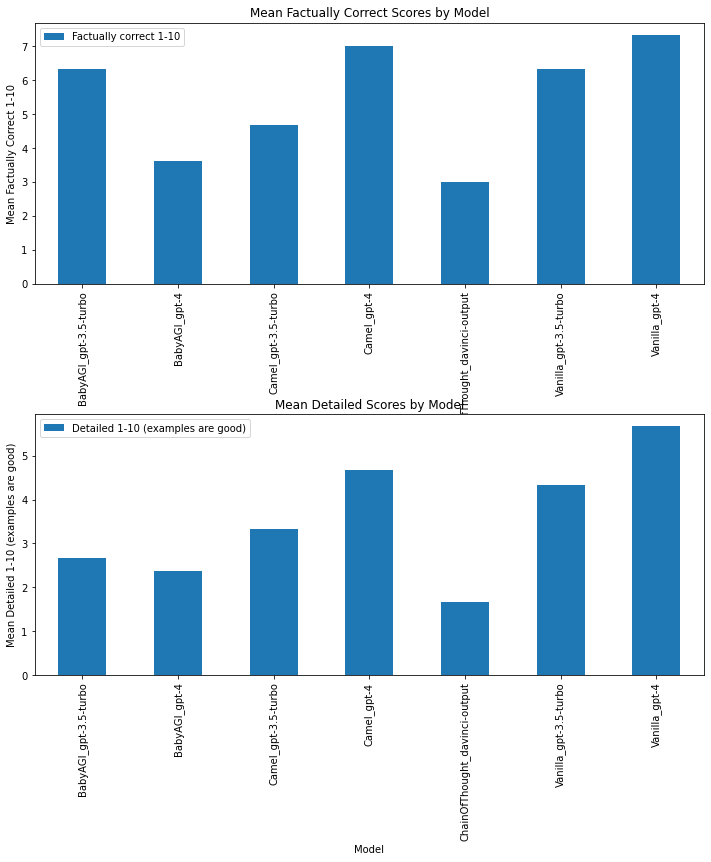

In [9]:
import matplotlib.pyplot as plt

# Create a new column that combines 'AGI', 'Task', and 'GPT' values as a single string
grouped_means['Model'] = grouped_means.apply(lambda row: f"{row['AGI']}_{row['GPT']}", axis=1)

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

# Plot the mean values for 'Factually correct 1-10'
grouped_means.plot(x='Model', y='Factually correct 1-10', kind='bar', ax=ax1, color='lightblue')
ax1.set_title("Mean Factually Correct Scores by Model")
ax1.set_xlabel("Model")
ax1.set_ylabel("Mean Factually Correct 1-10")
plt.sca(ax1)
plt.xticks(range(len(grouped_means)), grouped_means['Model'], rotation=90)

# Plot the mean values for 'Detailed 1-10 (examples are good)'
grouped_means.plot(x='Model', y='Detailed 1-10 (examples are good)', kind='bar', ax=ax2, color='lightblue')
ax2.set_title("Mean Detailed Scores by Model")
ax2.set_xlabel("Model")
ax2.set_ylabel("Mean Detailed 1-10 (examples are good)")
plt.sca(ax2)
plt.xticks(range(len(grouped_means)), grouped_means['Model'], rotation=90)

# Show the plots
plt.show()



